In [1]:
import pandas as pd
import numpy as np
from numpy import log2 as log

In [3]:
dataset = [
    ['<21', 'High', 'Male', 'Single' ,'No'],
    ['<21', 'High', 'Male', 'Married' ,'No'],
    ['21-35', 'High', 'Male', 'Single' ,'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single' ,'Yes'],
    ['>35', 'Low', 'Female', 'Married' ,'No'],
    ['21-35', 'Low', 'Female', 'Married' ,'Yes'],
    ['<21', 'Medium', 'Male', 'Single' ,'No'],
    ['<21', 'Low', 'Female', 'Married' ,'Yes'],
    ['>35', 'Medium', 'Female', 'Single' ,'Yes'],
    ['<21', 'Medium', 'Female', 'Married' ,'Yes'],
    ['21-35', 'Medium', 'Male', 'Married' ,'Yes'],
    ['21-35', 'High', 'Female', 'Single' ,'Yes'],
    ['>35', 'Medium', 'Male', 'Married' ,'No'],
]

In [4]:
columns = ["Age", "Income", "Gender", "Marital Status", "Buys"]

df = pd.DataFrame(dataset, columns=columns)

df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in range(0, 5):
    df[columns[i]] = le.fit_transform(df[columns[i]])
    
df

,Age,Income,Gender,Marital Status,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [108]:
test_data = [[1, 1, 0, 0]]
# test_data = [[2, 1, 0, 0]]
# test_data = [[0, 2, 1, 0]]

test = pd.DataFrame(test_data, columns=["Age", "Income", "Gender", "Marital Status"])

test

,Age,Income,Gender,Marital Status
0,1,1,0,0


In [109]:
eps = np.finfo(float).eps

print(eps)

2.220446049250313e-16


In [110]:
print(df[df.keys()[-1]].unique())

[0 1]


In [111]:
def find_entropy(df):
    
    Class = df.keys()[-1]
    
    values = df[Class].unique()
    
    entropy = 0
    
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
        
        print("Class : ", Class, " E(S) : ", entropy)
        
    return entropy
    

In [112]:
def find_entropy_attribute(df, attribute):
    
    Class = df.keys()[-1]
    
    variables = df[attribute].unique()
    
    target_variables = df[Class].unique()
    
    entropy2 = 0
    
    for variable in variables:
        entropy1 = 0
        
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class]==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            
            fraction1 = num/(den+eps)
            entropy1 += -fraction1*log(fraction1+eps)
            
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy1
        
        print("Class : ", Class, " E(T, X) : ", entropy2)
        
    return abs(entropy2)

In [113]:
def find_winner(df):
    
    IG = []
    
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-find_entropy_attribute(df, key))
        print("Index of attribute with max gain: ", np.argmax(IG))
        
    return df.keys()[:-1][np.argmax(IG)]

In [114]:
def find_subtable(df, node, value):
    return df[df[node]==value].reset_index(drop=True)

In [115]:
def build_tree(df, tree=None):
    
    node = find_winner(df)
    
    print("Node with maximum information gain: ", node)
    
    attrVals = np.unique(df[node])
    
    print("Attributes of ", node, " : ", attrVals)
    
    if tree is None:
        tree = {}
        tree[node] = {}
        
    for value in attrVals:
        subtable = find_subtable(df, node, value)
        print("Subtable : \n", subtable)
        
        uniqueValues, count = np.unique(subtable['Buys'], return_counts = True)
        
        print("Unique Values : ", uniqueValues)
        print("Their Count   : ", count)
        
        if(len(count)==1):
            tree[node][value] = uniqueValues[0]
        else:
            tree[node][value] = build_tree(subtable)
            
    return tree

In [116]:
dtree = build_tree(df)

dtree

Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.34676806944809574
Class :  Buys  E(T, X) :  -0.34676806944809563
Class :  Buys  E(T, X) :  -0.6935361388961914
Index of attribute with max gain:  0
Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.28571428571428553
Class :  Buys  E(T, X) :  -0.6792696431662093
Class :  Buys  E(T, X) :  -0.9110633930116756
Index of attribute with max gain:  0
Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.49261406801712543
Class :  Buys  E(T, X) :  -0.7884504573082889
Index of attribute with max gain:  0
Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.43156028428331517
Class :  Buys  E(T, X) :  -0.9241743523004406
Index of attribute with max gain:  0
Node with maximum information gain:  Age
Attributes

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}

In [117]:
def predict(instr, tree):
    
    for node in tree.keys():
        
        value = instr[node]
        
        tree = tree[node][value]
        
        predictions = 0
        
        if type(tree) is dict:
            predictions = predict(instr, tree)
        else:
            predictions = tree
            break
        
    return predictions

In [118]:
tester = test.iloc[0]


pred = predict(tester, dtree)

pred

1

In [122]:
# using sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


df1 = df.copy()

df1.drop('Buys', inplace=True, axis=1)

X = df1

sk_dtree = DecisionTreeClassifier(criterion="entropy")

sk_dtree.fit(X, df['Buys'])

sk_dtree.predict(test)

array([1])

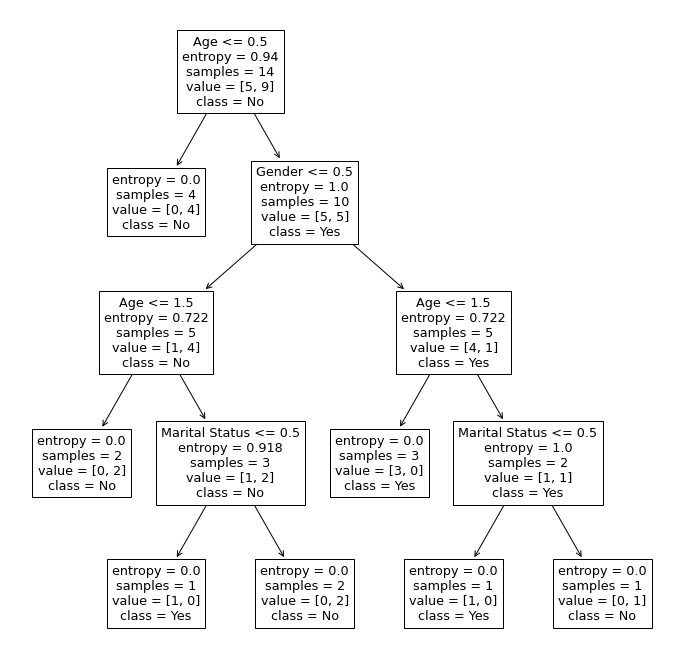

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
dec_tree = plot_tree(decision_tree=sk_dtree, feature_names = df.columns, class_names=["Yes", "No"])

plt.show()

In [124]:
dtree

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}